In [1]:
!pip install pandas scikit-learn matplotlib seaborn numpy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/162.3 kB 5.5 MB/s eta 0:00:01
     ---------------------------- --------- 122.9/162.3 kB 1.8 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.1/10.6 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/10.6 MB 3.4 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.6 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/10.6 MB 3.0 MB/s eta 0:00:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.drop(['Unnamed: 0','flight','duration'],axis=1,inplace=True)

In [7]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [11]:
df['airline'].value_counts

<bound method IndexOpsMixin.value_counts of 0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object>

<Axes: xlabel='airline'>

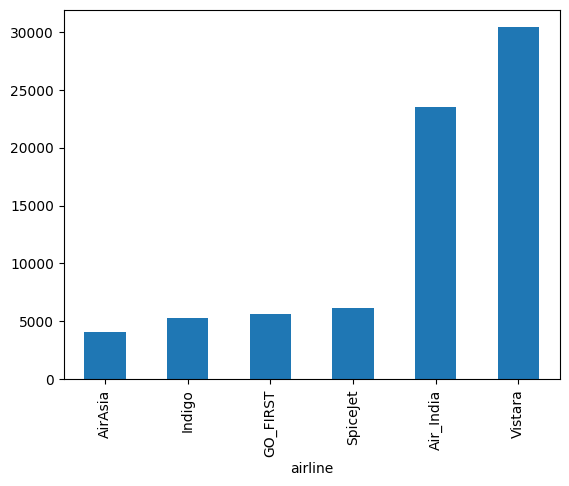

In [12]:
df.groupby(['airline'])['price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='airline'>

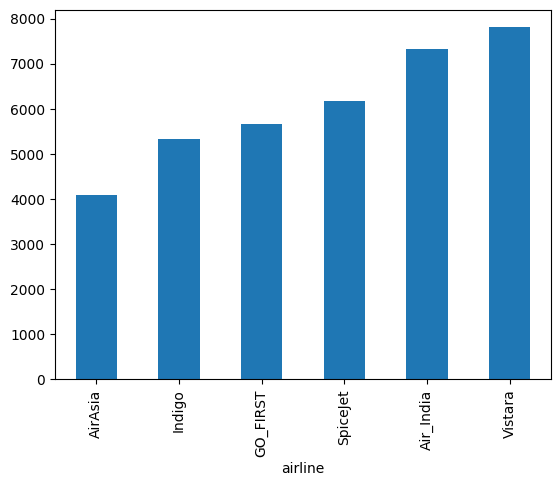

In [14]:
df[df['class']=='Economy'].groupby(['airline'])['price'].mean().sort_values().plot(kind='bar')

In [15]:
df['airline']=df['airline'].map({'AirAsia':0,'Indigo':1,'GO_FIRST':2,'SpiceJet':3,'Air_India':4,'Vistara':5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


<Axes: xlabel='source_city'>

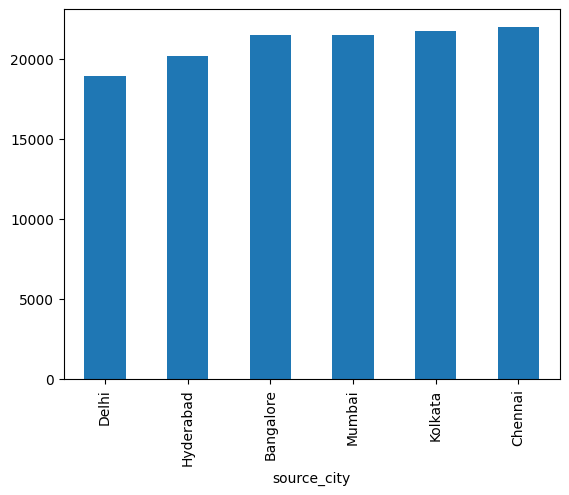

In [16]:
df.groupby(['source_city'])['price'].mean().sort_values().plot(kind='bar')